# Introducción a Machine Learning
En esta notebook veremos las implementaciones de los conceptos de Machine Learning, en lo que respecta a Redes Neuronales.
##Componentes de una RN:


1.   Entradas
2.   Capa de entrada de la red
3.   Capas ocultas de la red
4.   Capa de salida
5.   Pesos de entrada de neuronas
6.   Bias o sesgo
7.   Función de activación
8.   Valor de salida
9.   Algoritmo de ajuste de pesos
10.  Métricas de performance



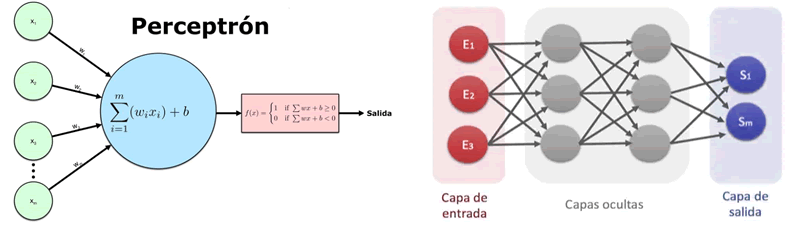

In [1]:
import tensorflow as tf
import numpy as np

In [2]:
#Fórmula de conversión de celsius a Fahrenheit: F=C*1.8+32
celsius = np.array([-40,-10,0,8,15,22,38], dtype=float)
fahrenheit = np.array([-40,14,32,46,59,72,100], dtype=float)

In [20]:
#Armado de un perceptrón simple
capa = tf.keras.layers.Dense(units=1, input_shape=[1])
modelo = tf.keras.Sequential([capa])
modelo.compile(
    optimizer = tf.keras.optimizers.Adam(0.1),
    loss = 'mean_squared_error',
    
)

In [4]:
#Hacemos algunas conversiones...
fhrt=modelo.predict([100])
print('Grados Celsius convertidos a Fahrenheit: '+str(fhrt))
fhrt=modelo.predict([0])
print('Grados Celsius convertidos a Fahrenheit: '+str(fhrt))
fhrt=modelo.predict([10])
print('Grados Celsius convertidos a Fahrenheit: '+str(fhrt))

Grados Celsius convertidos a Fahrenheit: [[-28.294266]]
Grados Celsius convertidos a Fahrenheit: [[0.]]
Grados Celsius convertidos a Fahrenheit: [[-2.8294265]]


In [5]:
#Chequeamos peso y bias del perceptrón entrenado
print('Pesos de la capa única de la red (perceptrón), Weight y Bias:')
print(capa.get_weights())

Pesos de la capa única de la red (perceptrón), Weight y Bias:
[array([[-0.28294265]], dtype=float32), array([0.], dtype=float32)]


In [6]:
#Entrenamiento de la red: Ajustes sucesivos de los pesos
print('Entrenando...')
historial=modelo.fit(celsius,fahrenheit,epochs=1000,verbose=False)
print('Entrenamiento completo')

Entrenando...
Entrenamiento completo


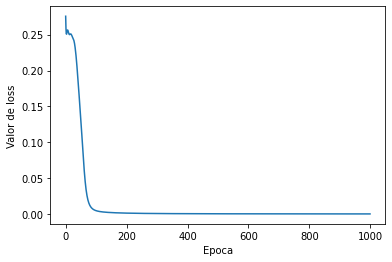

In [21]:
#Graficamos el valor (Magnitud) de Loss para las épocas
import matplotlib.pyplot as plt
plt.xlabel('Epoca')
plt.ylabel('Valor de loss')
plt.plot(historial.history['loss'])

plt.show()

In [8]:
#Hacemos algunas predicciones de otros valores
fhrt=modelo.predict([100])
print('Grados Celsius convertidos a Fahrenheit: '+str(fhrt))

Grados Celsius convertidos a Fahrenheit: [[211.74261]]


In [9]:
#Chequeamos peso y bias del perceptrón entrenado
print('Pesos de la capa única de la red (perceptrón), Weight y Bias:')
print(capa.get_weights())

Pesos de la capa única de la red (perceptrón), Weight y Bias:
[array([[1.7982396]], dtype=float32), array([31.918652], dtype=float32)]


In [10]:
#Armamos un perceptrón multicapa con el mismo caso
capa_oculta1=tf.keras.layers.Dense(units=3,input_shape=[1])
capa_oculta2=tf.keras.layers.Dense(units=3)
salida=tf.keras.layers.Dense(units=1)
modelo2=tf.keras.Sequential([capa_oculta1,capa_oculta2,salida])
modelo2.compile(
    optimizer = tf.keras.optimizers.Adam(0.1),
    loss = 'mean_squared_error'
)

### Ejercicio 1: Armar Red neuronal para la compuerta lógica XOR (OR Exclusivo). De acuerdo a la siguiente tabla de verdad, desarrollar una red que determine el valor correcto para todas las combinaciones. Probar diferentes arquitecturas: Perceptrón simple y perceptrón multicapa. Determinar valores óptimos de epochs de entrenamiento. ¿Qué arquitectura recomienda?

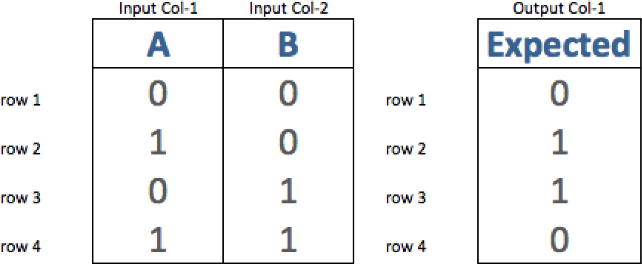

In [11]:
#Armar tabla de verdad
tuplas = np.array([[0,0],[0,1],[1,0],[1,1]], dtype=float)
resultados = np.array([0,1,1,0], dtype=float)

#Armar modelo RN de predicción
capa1 = tf.keras.layers.Dense(units=3, input_shape=[2], activation='sigmoid')
capa2 = tf.keras.layers.Dense(units=1, activation='sigmoid')#softsign
modelo = tf.keras.Sequential([capa1,capa2])
modelo.compile(
    optimizer = tf.keras.optimizers.Adam(0.1),
    loss = 'mean_squared_error'
)

#Entrenamiento
historial=modelo.fit(tuplas,resultados,epochs=1000,verbose=False)

#Evaluación
modelo.predict([[0,0]])

array([[0.00197315]], dtype=float32)

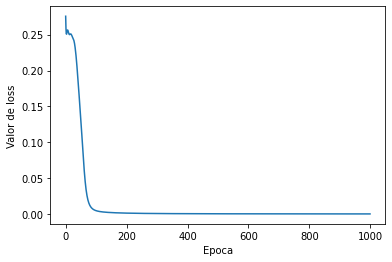

In [22]:
import matplotlib.pyplot as plt
plt.xlabel('Epoca')
plt.ylabel('Valor de loss')
plt.plot(historial.history['loss'])
plt.show()

In [13]:
print(modelo.predict([[0,0]]))
print(modelo.predict([[0,1]]))
print(modelo.predict([[1,0]]))
print(modelo.predict([[1,1]]))

[[0.00197315]]
[[0.9913859]]
[[0.99180746]]
[[0.0142794]]


### Ejercicio 2: Armar una RN que permita la correcta evaluación de una compuerta XOR personalizada de 3 entradas. Dicha compuerta debería devolver 1 si cualquiera de los elementos es 1 o los 3 son 1, pero 0 si exactamente 2 elementos son 1.

In [14]:
#Armar tabla de verdad

#Armar modelo RN de predicción

#Entrenamiento

#Evaluación

### Ejercicio 3: Implementar las compuertas AND y OR, para 2 y 3 entradas. Evaluar distintas arquitecturas para determinar cuál brinda una convergencia más rápida. Para recordar: AND devuelve 1 solamente para dos entradas 1, y OR devuelve 0 solamente para dos entradas 0.